In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Define the data
data = {
    'SID': [1004.0, 1005.0, 1008.0, 1010.0, 1011.0, 1013.0, 1017.0, 1018.0, 1019.0, 1021.0, 1022.0, 1023.0,
            1054.0, 1055.0, 1056.0, 1057.0, 1058.0, 1068.0, 1069.0, 1072.0, 1073.0, 1074.0, 1075.0, 1077.0,
            1079.0, 1080.0],
    'NFix': [34130, 32604, 28411, 29544, 28276, 32143, 28352, 31207, 33145, 32616, 30793, 31631,
             30591, 31736, 31360, 30674, 32014, 28932, 32163, 30235, 33611, 30121, 32971, 29665,
             29910, 30282]
}



In [5]:
# Read the CSV file
n_fix_df = pd.read_csv("/Volumes/TwoTeras/PCA/Data_Sets/Experiment_1/NFixations.csv")

# Preview the DataFrame
print(n_fix_df.head())

n_fix_df["Hue"] = "Tracy"
data["Hue"] = "Vincent"

   SubjectID   NFix
0       1754  27762
1       2258  27005
2       2361  21533
3       2693  25106
4       3246  19061


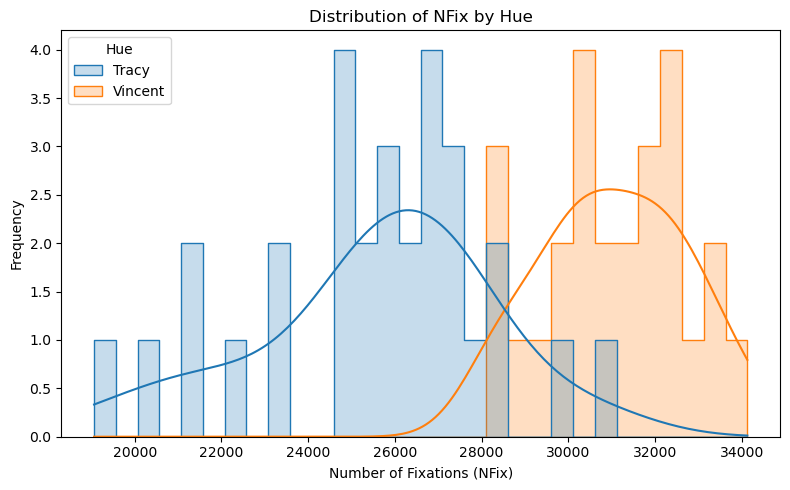

In [13]:
# Ensure n_fix_df is already a DataFrame with Hue column
n_fix_df["Hue"] = "Tracy"

# Convert the dictionary to DataFrame and add the Hue label
data_df = pd.DataFrame(data)
data_df["Hue"] = "Vincent"

# Combine both DataFrames
combined_df = pd.concat([n_fix_df, data_df], ignore_index=True)

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=combined_df, x="NFix", hue="Hue", kde=True, bins=30, element="step")

plt.title("Distribution of NFix by Hue")
plt.xlabel("Number of Fixations (NFix)")
plt.ylabel("Frequency")
#plt.legend(title="Hue")
plt.tight_layout()
plt.show()

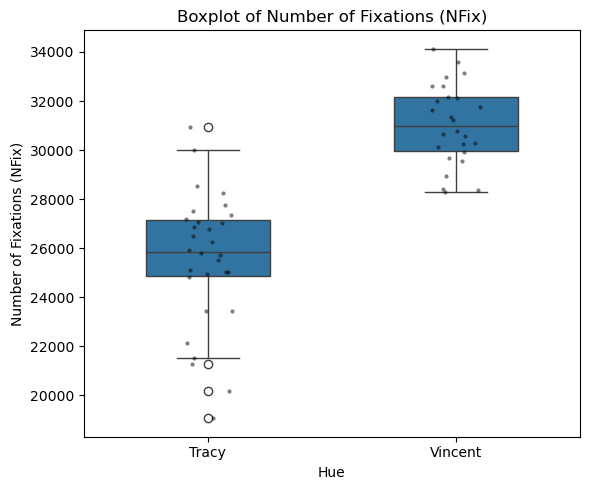

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert data to DataFrame if needed
data_df = pd.DataFrame(data)
data_df["Hue"] = "Vincent"

# Add label to the other DataFrame
n_fix_df["Hue"] = "Tracy"

# Combine both
combined_df = pd.concat([n_fix_df, data_df], ignore_index=True)

# Plot boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=combined_df, x="Hue", y="NFix", width=0.5)

# Optional: add individual data points
sns.stripplot(data=combined_df, x="Hue", y="NFix", color='black', size=3, alpha=0.5, jitter=True)

# Customize
plt.title("Boxplot of Number of Fixations (NFix)")
plt.xlabel("Hue")
plt.ylabel("Number of Fixations (NFix)")
plt.tight_layout()
plt.show()


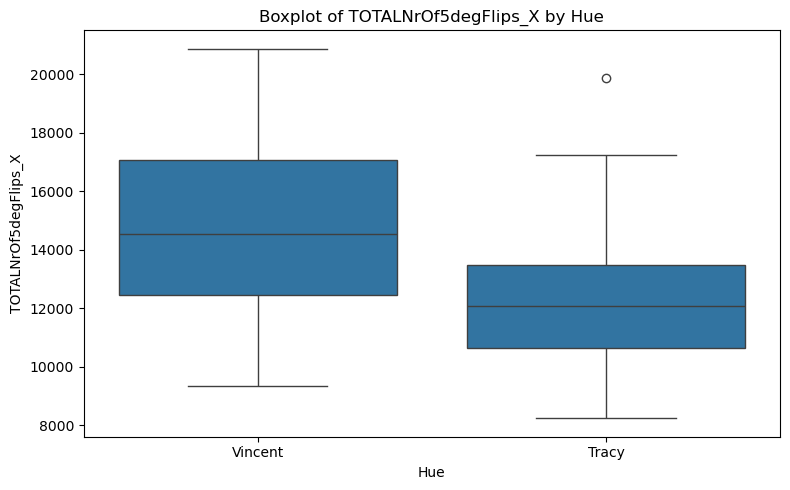

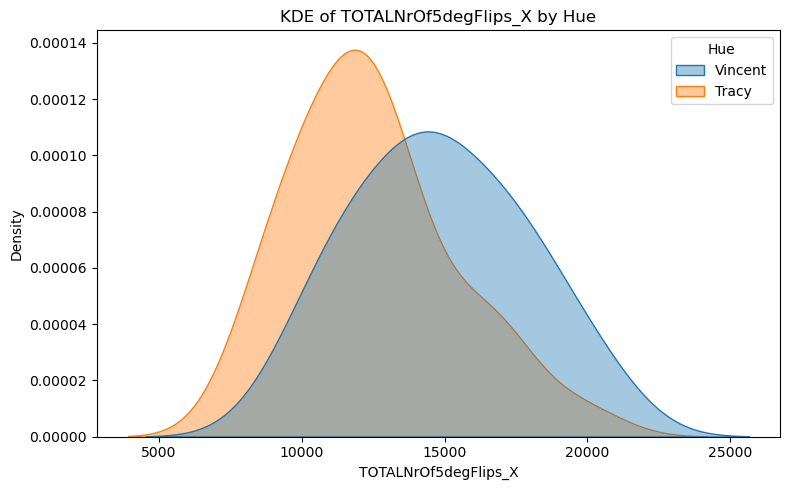

ModuleNotFoundError: No module named 'ace_tools'

In [15]:
# Define Vincent's data
vincent_data = {
    'TOTALNrOf5degFlips_X': [17712, 11485, 19808, 14725, 16428, 19163, 11834, 11812, 20870, 13755,
                             12234, 14134, 17288, 13295, 16433, 9337, 14233, 13061, 18233, 14323,
                             15586, 15015, 15967, 10464, 10425, 17748],
    'TOTALNrOf5degFlips_Y': [6496, 3121, 4759, 5286, 4022, 5188, 3427, 2727, 5794, 4645,
                             3869, 3724, 5720, 3669, 3542, 4739, 4099, 4973, 5152, 2789,
                             5281, 4568, 4821, 5453, 3351, 4592],
    'Hue': ['Vincent'] * 26
}

# Define Tracy's data
tracy_data = {
    'SubjectID': [365, 479, 1754, 2258, 2361, 2693, 3246, 3310, 3572, 3976,
                  4176, 4597, 4796, 4917, 5238, 5531, 5741, 6642, 7093, 7264,
                  7412, 7842, 8007, 8469, 8673, 8695, 9472, 9502, 9586, 9601],
    'TOTALNrOf5degFlips_Y': [3659, 4109, 5830, 5060, 3989, 5762, 2849, 4733, 4194, 3393,
                             4657, 3646, 3510, 3518, 3384, 4389, 5026, 6598, 4156, 4259,
                             3629, 3737, 4503, 4125, 6783, 3793, 6916, 3812, 3410, 5220],
    'TOTALNrOf5degFlips_X': [13014, 10652, 19870, 17247, 12048, 16638, 9259, 9144, 12057, 10693,
                             12817, 15983, 10617, 13087, 8939, 13505, 10737, 14965, 12076, 12167,
                             14427, 8238, 10394, 10102, 13445, 11921, 12754, 11799, 8397, 17081],
    'Hue': ['Tracy'] * 30
}

# Create DataFrames
vincent_df = pd.DataFrame(vincent_data)
tracy_df = pd.DataFrame(tracy_data)

# Drop SubjectID for compatibility
tracy_df = tracy_df.drop(columns='SubjectID')

# Combine the data
combined_df = pd.concat([vincent_df, tracy_df], ignore_index=True)



/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_6567/3076501784.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Hue", y="NFix", ax=axes[0],


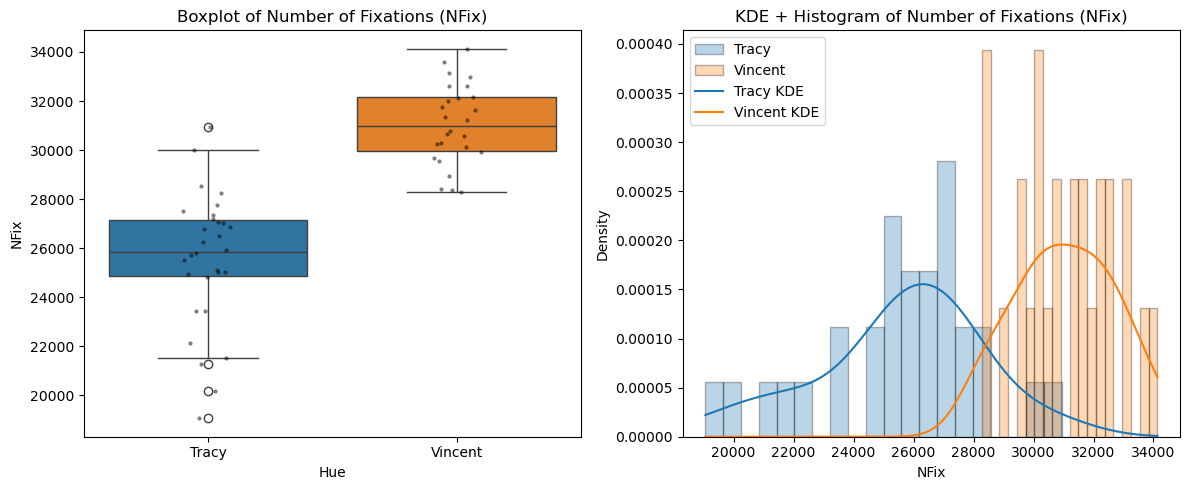

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

tracy_color = "#1f77b4"   # Blue
vincent_color = "#ff7f0e" # Orange


# Split data
tracy_nfix = combined_df[combined_df["Hue"] == "Tracy"]["NFix"].astype(float)
vincent_nfix = combined_df[combined_df["Hue"] == "Vincent"]["NFix"].astype(float)

# KDEs
kde_tracy = gaussian_kde(tracy_nfix)
kde_vincent = gaussian_kde(vincent_nfix)
nfix_range = np.linspace(min(tracy_nfix.min(), vincent_nfix.min()),
                         max(tracy_nfix.max(), vincent_nfix.max()), 500)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot + strip
sns.boxplot(data=combined_df, x="Hue", y="NFix", ax=axes[0],
            palette={"Tracy": tracy_color, "Vincent": vincent_color})
sns.stripplot(data=combined_df, x="Hue", y="NFix", color='black', size=3, alpha=0.5, jitter=True, ax=axes[0])
axes[0].set_title("Boxplot of Number of Fixations (NFix)")
axes[0].set_xlabel("Hue")
axes[0].set_ylabel("NFix")

# KDE + histogram
axes[1].hist(tracy_nfix, bins=20, alpha=0.3, density=True, label="Tracy", edgecolor='black', color=tracy_color)
axes[1].hist(vincent_nfix, bins=20, alpha=0.3, density=True, label="Vincent", edgecolor='black', color=vincent_color)
axes[1].plot(nfix_range, kde_tracy(nfix_range), label='Tracy KDE', color=tracy_color)
axes[1].plot(nfix_range, kde_vincent(nfix_range), label='Vincent KDE', color=vincent_color)
axes[1].set_title("KDE + Histogram of Number of Fixations (NFix)")
axes[1].set_xlabel("NFix")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_6567/4282502647.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Hue", y="TOTALNrOf5degFlips_X", ax=axes[0, 0], palette={"Tracy": tracy_color, "Vincent": vincent_color})
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_6567/4282502647.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Hue", y="TOTALNrOf5degFlips_Y", ax=axes[1, 0], palette={"Tracy": tracy_color, "Vincent": vincent_color})


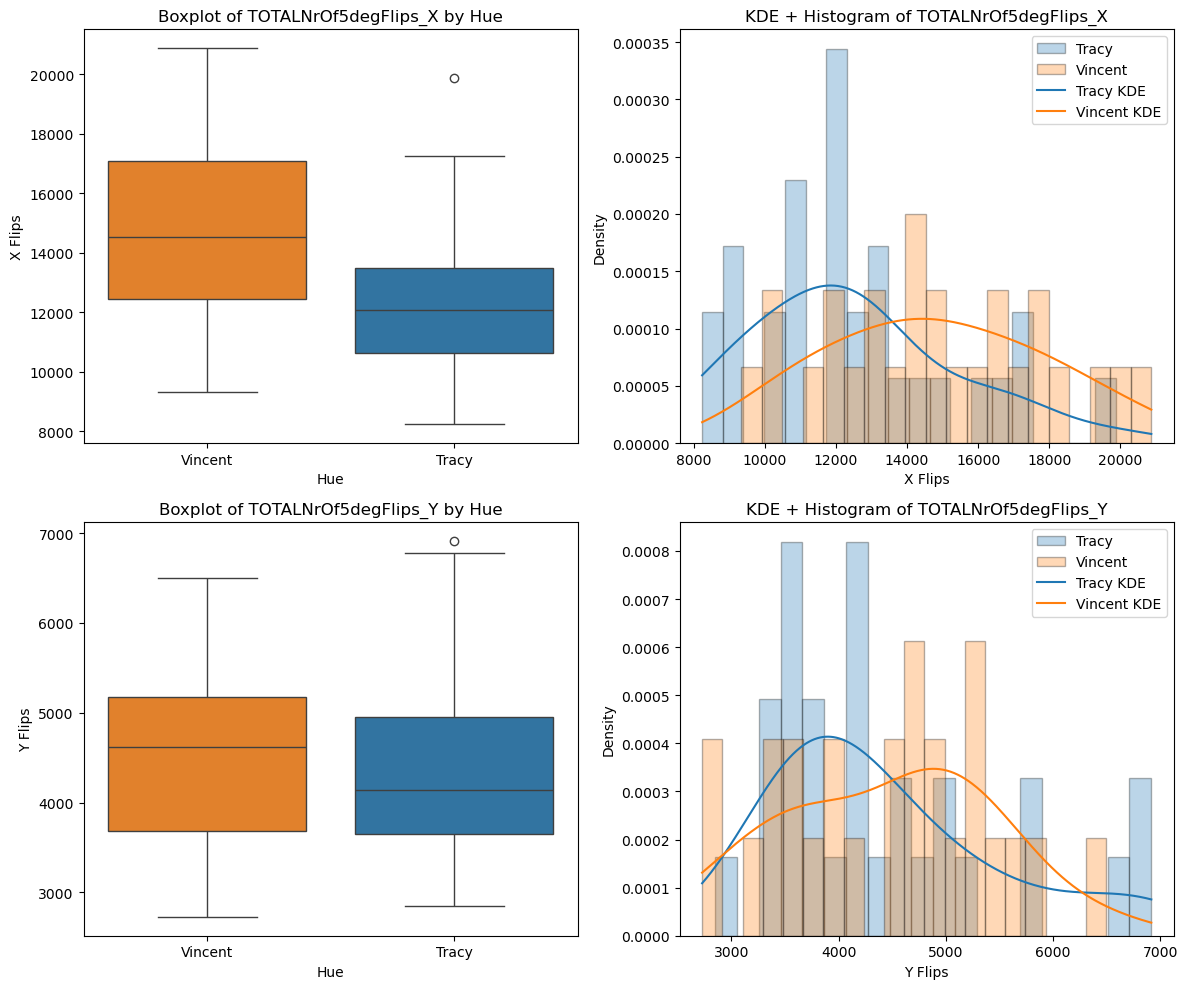

In [24]:
# Define consistent colors for Tracy and Vincent
tracy_color = "#1f77b4"   # Blue
vincent_color = "#ff7f0e" # Orange

# Create 2x2 grid with matched colors
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot - X
sns.boxplot(data=combined_df, x="Hue", y="TOTALNrOf5degFlips_X", ax=axes[0, 0], palette={"Tracy": tracy_color, "Vincent": vincent_color})
axes[0, 0].set_title("Boxplot of TOTALNrOf5degFlips_X by Hue")
axes[0, 0].set_xlabel("Hue")
axes[0, 0].set_ylabel("X Flips")

# KDE + Histogram - X
axes[0, 1].hist(tracy_x, bins=20, alpha=0.3, density=True, label="Tracy", edgecolor='black', color=tracy_color)
axes[0, 1].hist(vincent_x, bins=20, alpha=0.3, density=True, label="Vincent", edgecolor='black', color=vincent_color)
axes[0, 1].plot(x_range, tracy_kde_x(x_range), label='Tracy KDE', color=tracy_color)
axes[0, 1].plot(x_range, vincent_kde_x(x_range), label='Vincent KDE', color=vincent_color)
axes[0, 1].set_title("KDE + Histogram of TOTALNrOf5degFlips_X")
axes[0, 1].set_xlabel("X Flips")
axes[0, 1].set_ylabel("Density")
axes[0, 1].legend()

# Boxplot - Y
sns.boxplot(data=combined_df, x="Hue", y="TOTALNrOf5degFlips_Y", ax=axes[1, 0], palette={"Tracy": tracy_color, "Vincent": vincent_color})
axes[1, 0].set_title("Boxplot of TOTALNrOf5degFlips_Y by Hue")
axes[1, 0].set_xlabel("Hue")
axes[1, 0].set_ylabel("Y Flips")

# KDE + Histogram - Y
axes[1, 1].hist(tracy_y, bins=20, alpha=0.3, density=True, label="Tracy", edgecolor='black', color=tracy_color)
axes[1, 1].hist(vincent_y, bins=20, alpha=0.3, density=True, label="Vincent", edgecolor='black', color=vincent_color)
axes[1, 1].plot(y_range, tracy_kde_y(y_range), label='Tracy KDE', color=tracy_color)
axes[1, 1].plot(y_range, vincent_kde_y(y_range), label='Vincent KDE', color=vincent_color)
axes[1, 1].set_title("KDE + Histogram of TOTALNrOf5degFlips_Y")
axes[1, 1].set_xlabel("Y Flips")
axes[1, 1].set_ylabel("Density")
axes[1, 1].legend()

# Final layout
plt.tight_layout()
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_1296/2335288350.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Hue", y="FixationDist_med", ax=axes[0],


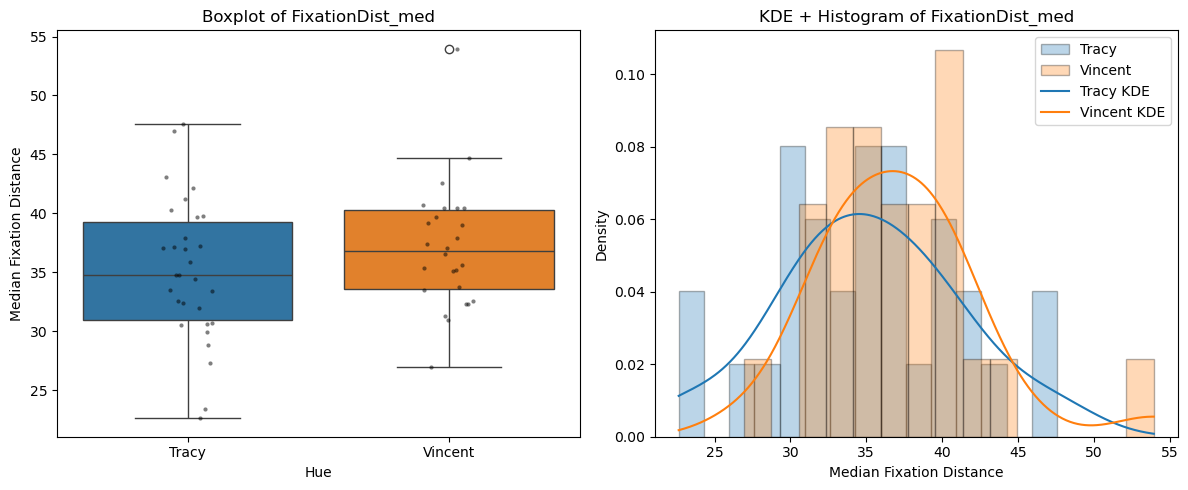

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Tracy's corrected fixation distance data
tracy_data = {
    "SID": [1754, 2258, 2361, 2693, 3246, 3310, 3572, 365, 3976, 4176, 4597, 479, 4796,
            4917, 5238, 5531, 5741, 6642, 7093, 7264, 7412, 7842, 8007, 8469, 8673,
            8695, 9472, 9502, 9586, 9601],
    "FixationDist_med": [27.290968, 36.944408, 33.424915, 46.975172, 37.923382, 41.192874,
                         30.672224, 47.585249, 39.682712, 31.960740, 37.112461, 43.057382,
                         40.290474, 35.915823, 32.537905, 28.812310, 34.411436, 29.961154,
                         22.633888, 34.796491, 39.770024, 33.518798, 30.556939, 42.161427,
                         30.613218, 34.769818, 23.451281, 32.414320, 37.049319, 37.271776],
    "Hue": "Tracy"
}

# Vincent's corrected fixation distance data
vincent_data = {
    "SID": [1004.0, 1005.0, 1008.0, 1010.0, 1011.0, 1013.0, 1017.0, 1018.0, 1019.0, 1021.0,
            1022.0, 1023.0, 1054.0, 1055.0, 1056.0, 1057.0, 1058.0, 1068.0, 1069.0, 1072.0,
            1073.0, 1074.0, 1075.0, 1077.0, 1079.0, 1080.0],
    "FixationDist_med": [32.353938, 40.438331, 37.419463, 40.470488, 33.766128, 30.988624,
                         40.700405, 32.302617, 32.560079, 35.396491, 37.958016, 40.497528,
                         26.938705, 42.594565, 36.549597, 35.187322, 44.718576, 37.090421,
                         35.082895, 53.956936, 39.724701, 39.213845, 38.996292, 31.325273,
                         33.542777, 35.616828],
    "Hue": "Vincent"
}

# Create DataFrames
df_tracy = pd.DataFrame(tracy_data)
df_vincent = pd.DataFrame(vincent_data)

# Combine
combined_df = pd.concat([df_tracy, df_vincent], ignore_index=True)

# Extract values
tracy_vals = df_tracy['FixationDist_med'].astype(float)
vincent_vals = df_vincent['FixationDist_med'].astype(float)

# KDEs
kde_tracy = gaussian_kde(tracy_vals)
kde_vincent = gaussian_kde(vincent_vals)
x_range = np.linspace(min(tracy_vals.min(), vincent_vals.min()),
                      max(tracy_vals.max(), vincent_vals.max()), 500)

# Colors
tracy_color = "#1f77b4"
vincent_color = "#ff7f0e"

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=combined_df, x="Hue", y="FixationDist_med", ax=axes[0],
            palette={"Tracy": tracy_color, "Vincent": vincent_color})
sns.stripplot(data=combined_df, x="Hue", y="FixationDist_med", color='black',
              size=3, alpha=0.5, jitter=True, ax=axes[0])
axes[0].set_title("Boxplot of FixationDist_med")
axes[0].set_xlabel("Hue")
axes[0].set_ylabel("Median Fixation Distance")

# KDE + histogram
axes[1].hist(tracy_vals, bins=15, density=True, alpha=0.3,
             color=tracy_color, edgecolor='black', label="Tracy")
axes[1].hist(vincent_vals, bins=15, density=True, alpha=0.3,
             color=vincent_color, edgecolor='black', label="Vincent")
axes[1].plot(x_range, kde_tracy(x_range), color=tracy_color, label="Tracy KDE")
axes[1].plot(x_range, kde_vincent(x_range), color=vincent_color, label="Vincent KDE")
axes[1].set_title("KDE + Histogram of FixationDist_med")
axes[1].set_xlabel("Median Fixation Distance")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_1296/2884900490.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_fd_df, x="Hue", y="FixationDuration_med", ax=axes[0],


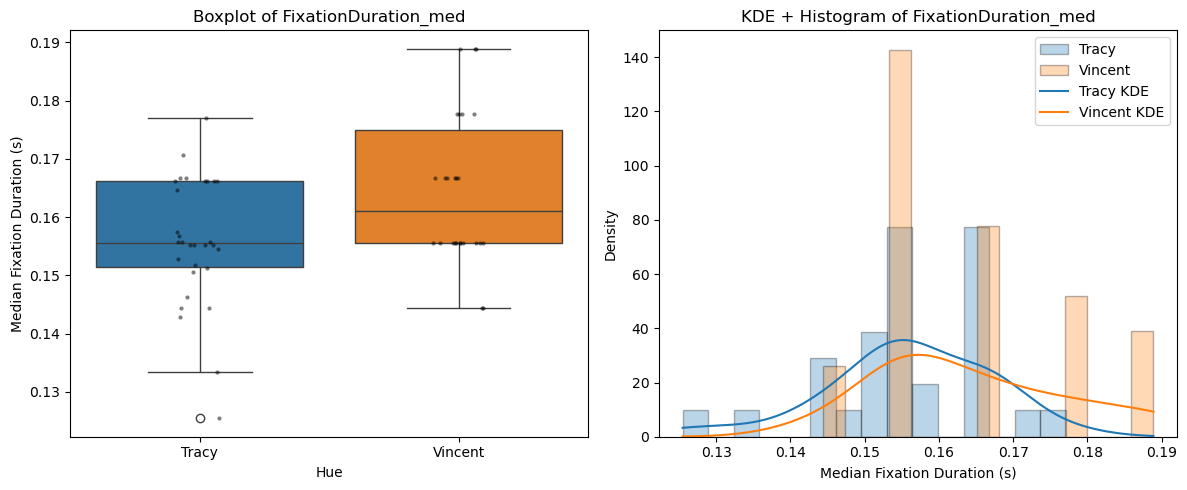

In [5]:
# Tracy fixation duration medians
tracy_fix_dur = {
    'SID': [1754, 2258, 2361, 2693, 3246, 3310, 3572, 365, 3976, 4176,
            4597, 479, 4796, 4917, 5238, 5531, 5741, 6642, 7093, 7264,
            7412, 7842, 8007, 8469, 8673, 8695, 9472, 9502, 9586, 9601],
    'FixationDuration_med': [
        0.166161, 0.164674, 0.166159, 0.177071, 0.144336, 0.155745,
        0.152768, 0.166161, 0.155248, 0.151281, 0.166656, 0.155247,
        0.125487, 0.154562, 0.133425, 0.157451, 0.144336, 0.155743,
        0.166161, 0.146321, 0.166656, 0.155743, 0.166160, 0.170624,
        0.156736, 0.142852, 0.150536, 0.155249, 0.151777, 0.155248
    ],
    'Hue': ['Tracy'] * 30
}

# Vincent fixation duration medians
vincent_fix_dur = {
    'SID': [1004.0, 1005.0, 1008.0, 1010.0, 1011.0, 1013.0, 1017.0, 1018.0, 1019.0, 1021.0,
            1022.0, 1023.0, 1054.0, 1055.0, 1056.0, 1057.0, 1058.0, 1068.0, 1069.0, 1072.0,
            1073.0, 1074.0, 1075.0, 1077.0, 1079.0, 1080.0],
    'FixationDuration_med': [
        0.155556, 0.144444, 0.166667, 0.166667, 0.188889, 0.155556,
        0.188889, 0.166667, 0.155556, 0.155556, 0.177778, 0.155556,
        0.166667, 0.155556, 0.155556, 0.166667, 0.155556, 0.188889,
        0.155556, 0.166667, 0.144444, 0.177778, 0.155556, 0.177778,
        0.177778, 0.155556
    ],
    'Hue': ['Vincent'] * 26
}

# Create DataFrames
df_tracy_fd = pd.DataFrame(tracy_fix_dur)
df_vincent_fd = pd.DataFrame(vincent_fix_dur)
combined_fd_df = pd.concat([df_tracy_fd, df_vincent_fd], ignore_index=True)

# Extract values
tracy_vals_fd = df_tracy_fd['FixationDuration_med'].astype(float)
vincent_vals_fd = df_vincent_fd['FixationDuration_med'].astype(float)

# KDEs
kde_tracy_fd = gaussian_kde(tracy_vals_fd)
kde_vincent_fd = gaussian_kde(vincent_vals_fd)
x_range_fd = np.linspace(min(tracy_vals_fd.min(), vincent_vals_fd.min()),
                         max(tracy_vals_fd.max(), vincent_vals_fd.max()), 500)

# Colors
tracy_color = "#1f77b4"
vincent_color = "#ff7f0e"

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=combined_fd_df, x="Hue", y="FixationDuration_med", ax=axes[0],
            palette={"Tracy": tracy_color, "Vincent": vincent_color})
sns.stripplot(data=combined_fd_df, x="Hue", y="FixationDuration_med", color='black',
              size=3, alpha=0.5, jitter=True, ax=axes[0])
axes[0].set_title("Boxplot of FixationDuration_med")
axes[0].set_xlabel("Hue")
axes[0].set_ylabel("Median Fixation Duration (s)")

# KDE + histogram
axes[1].hist(tracy_vals_fd, bins=15, density=True, alpha=0.3,
             color=tracy_color, edgecolor='black', label="Tracy")
axes[1].hist(vincent_vals_fd, bins=15, density=True, alpha=0.3,
             color=vincent_color, edgecolor='black', label="Vincent")
axes[1].plot(x_range_fd, kde_tracy_fd(x_range_fd), color=tracy_color, label="Tracy KDE")
axes[1].plot(x_range_fd, kde_vincent_fd(x_range_fd), color=vincent_color, label="Vincent KDE")
axes[1].set_title("KDE + Histogram of FixationDuration_med")
axes[1].set_xlabel("Median Fixation Duration (s)")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_1296/628603111.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bowley, x="Hue", y="Bowley", ax=axes[0],


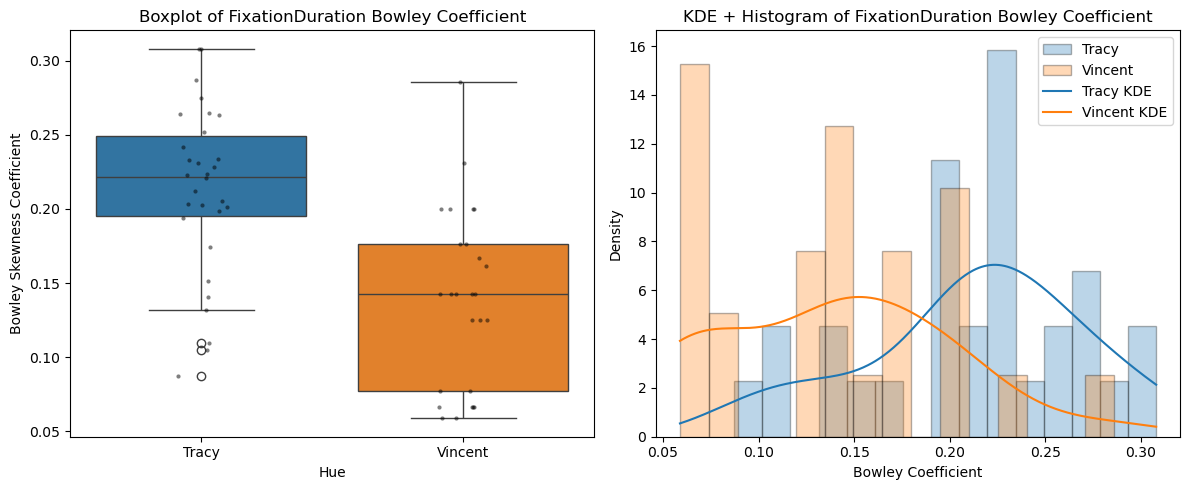

In [6]:
# Extract Bowley coefficient values
tracy_bowley = [
    0.131651, 0.212267, 0.174614, 0.087203, 0.233212, 0.264252, 0.231191,
    0.203035, 0.198786, 0.193627, 0.205070, 0.201196, 0.307939, 0.151465,
    0.274440, 0.263604, 0.104909, 0.223590, 0.264620, 0.251778, 0.228501,
    0.233842, 0.220844, 0.202894, 0.241756, 0.109548, 0.140422, 0.286734,
    0.307766, 0.222821
]

vincent_bowley = [  # Calculated as (Q3 - 2*median + Q1) / (Q3 - Q1)
    (0.233333 - 2*0.155556 + 0.088889) / (0.233333 - 0.088889),
    (0.244444 - 2*0.144444 + 0.077778) / (0.244444 - 0.077778),
    (0.255556 - 2*0.166667 + 0.088889) / (0.255556 - 0.088889),
    (0.266667 - 2*0.166667 + 0.088889) / (0.266667 - 0.088889),
    (0.288889 - 2*0.188889 + 0.111111) / (0.288889 - 0.111111),
    (0.255556 - 2*0.155556 + 0.100000) / (0.255556 - 0.100000),
    (0.300000 - 2*0.188889 + 0.111111) / (0.300000 - 0.111111),
    (0.255556 - 2*0.166667 + 0.100000) / (0.255556 - 0.100000),
    (0.233333 - 2*0.155556 + 0.088889) / (0.233333 - 0.088889),
    (0.244444 - 2*0.155556 + 0.088889) / (0.244444 - 0.088889),
    (0.266667 - 2*0.177778 + 0.100000) / (0.266667 - 0.100000),
    (0.255556 - 2*0.155556 + 0.083333) / (0.255556 - 0.083333),
    (0.266667 - 2*0.166667 + 0.100000) / (0.266667 - 0.100000),
    (0.255556 - 2*0.155556 + 0.088889) / (0.255556 - 0.088889),
    (0.244444 - 2*0.155556 + 0.088889) / (0.244444 - 0.088889),
    (0.277778 - 2*0.166667 + 0.088889) / (0.277778 - 0.088889),
    (0.244444 - 2*0.155556 + 0.088889) / (0.244444 - 0.088889),
    (0.288889 - 2*0.188889 + 0.100000) / (0.288889 - 0.100000),
    (0.244444 - 2*0.155556 + 0.100000) / (0.244444 - 0.100000),
    (0.255556 - 2*0.166667 + 0.088889) / (0.255556 - 0.088889),
    (0.222222 - 2*0.144444 + 0.088889) / (0.222222 - 0.088889),
    (0.266667 - 2*0.177778 + 0.100000) / (0.266667 - 0.100000),
    (0.244444 - 2*0.155556 + 0.088889) / (0.244444 - 0.088889),
    (0.277778 - 2*0.177778 + 0.088889) / (0.277778 - 0.088889),
    (0.277778 - 2*0.177778 + 0.100000) / (0.277778 - 0.100000),
    (0.255556 - 2*0.155556 + 0.088889) / (0.255556 - 0.088889),
]

# Build DataFrame
df_bowley = pd.DataFrame({
    "Bowley": tracy_bowley + vincent_bowley,
    "Hue": ["Tracy"] * len(tracy_bowley) + ["Vincent"] * len(vincent_bowley)
})

# Values
tracy_vals_bowley = np.array(tracy_bowley)
vincent_vals_bowley = np.array(vincent_bowley)
kde_tracy_bowley = gaussian_kde(tracy_vals_bowley)
kde_vincent_bowley = gaussian_kde(vincent_vals_bowley)
x_range_bowley = np.linspace(min(df_bowley.Bowley), max(df_bowley.Bowley), 500)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df_bowley, x="Hue", y="Bowley", ax=axes[0],
            palette={"Tracy": tracy_color, "Vincent": vincent_color})
sns.stripplot(data=df_bowley, x="Hue", y="Bowley", color='black',
              size=3, alpha=0.5, jitter=True, ax=axes[0])
axes[0].set_title("Boxplot of FixationDuration Bowley Coefficient")
axes[0].set_xlabel("Hue")
axes[0].set_ylabel("Bowley Skewness Coefficient")

# KDE + histogram
axes[1].hist(tracy_vals_bowley, bins=15, density=True, alpha=0.3,
             color=tracy_color, edgecolor='black', label="Tracy")
axes[1].hist(vincent_vals_bowley, bins=15, density=True, alpha=0.3,
             color=vincent_color, edgecolor='black', label="Vincent")
axes[1].plot(x_range_bowley, kde_tracy_bowley(x_range_bowley), color=tracy_color, label="Tracy KDE")
axes[1].plot(x_range_bowley, kde_vincent_bowley(x_range_bowley), color=vincent_color, label="Vincent KDE")
axes[1].set_title("KDE + Histogram of FixationDuration Bowley Coefficient")
axes[1].set_xlabel("Bowley Coefficient")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_1296/1668445836.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Hue", y="FixationDist_med", width=0.5, ax=axes[0],


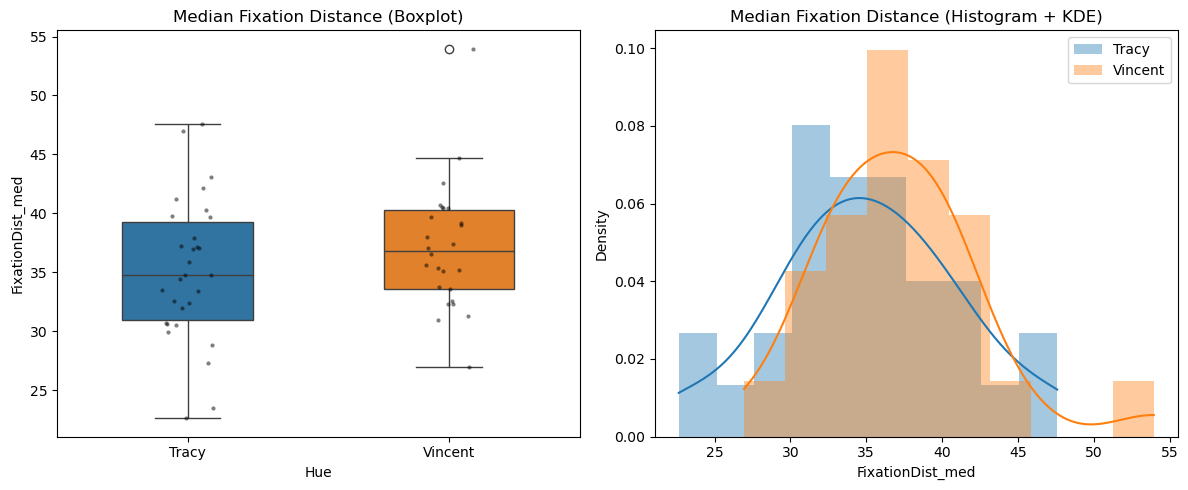

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tracy's corrected fixation distance data
tracy_data = {
    "SID": [1754, 2258, 2361, 2693, 3246, 3310, 3572, 365, 3976, 4176, 4597, 479, 4796,
            4917, 5238, 5531, 5741, 6642, 7093, 7264, 7412, 7842, 8007, 8469, 8673,
            8695, 9472, 9502, 9586, 9601],
    "FixationDist_med": [27.290968, 36.944408, 33.424915, 46.975172, 37.923382, 41.192874,
                         30.672224, 47.585249, 39.682712, 31.960740, 37.112461, 43.057382,
                         40.290474, 35.915823, 32.537905, 28.812310, 34.411436, 29.961154,
                         22.633888, 34.796491, 39.770024, 33.518798, 30.556939, 42.161427,
                         30.613218, 34.769818, 23.451281, 32.414320, 37.049319, 37.271776],
    "Hue": "Tracy"
}

# Vincent's corrected fixation distance data
vincent_data = {
    "SID": [1004.0, 1005.0, 1008.0, 1010.0, 1011.0, 1013.0, 1017.0, 1018.0, 1019.0, 1021.0,
            1022.0, 1023.0, 1054.0, 1055.0, 1056.0, 1057.0, 1058.0, 1068.0, 1069.0, 1072.0,
            1073.0, 1074.0, 1075.0, 1077.0, 1079.0, 1080.0],
    "FixationDist_med": [32.353938, 40.438331, 37.419463, 40.470488, 33.766128, 30.988624,
                         40.700405, 32.302617, 32.560079, 35.396491, 37.958016, 40.497528,
                         26.938705, 42.594565, 36.549597, 35.187322, 44.718576, 37.090421,
                         35.082895, 53.956936, 39.724701, 39.213845, 38.996292, 31.325273,
                         33.542777, 35.616828],
    "Hue": "Vincent"
}

# Create DataFrames
df_tracy = pd.DataFrame(tracy_data)
df_vincent = pd.DataFrame(vincent_data)

# Combine
combined_df = pd.concat([df_tracy, df_vincent], ignore_index=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=combined_df, x="Hue", y="FixationDist_med", width=0.5, ax=axes[0],
            palette={"Tracy": tracy_color, "Vincent": vincent_color})
sns.stripplot(data=combined_df, x="Hue", y="FixationDist_med", color='black', size=3, alpha=0.5, jitter=True, ax=axes[0])
axes[0].set_title("Median Fixation Distance (Boxplot)")
axes[0].set_ylabel("FixationDist_med")
axes[0].set_xlabel("Hue")

# Histogram + KDE
colors = {"Tracy": "#1f77b4", "Vincent": "#ff7f0e"}
for hue, color in colors.items():
    subset = combined_df[combined_df["Hue"] == hue]
    sns.histplot(subset["FixationDist_med"], kde=True, stat="density", bins=10,
                 label=hue, color=color, alpha=0.4, edgecolor=None, ax=axes[1])

axes[1].legend()
axes[1].set_title("Median Fixation Distance (Histogram + KDE)")
axes[1].set_xlabel("FixationDist_med")
axes[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_1296/3104558127.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="Hue", y=eye, ax=axes[i, 0], palette=colors)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_1296/3104558127.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="Hue", y=eye, ax=axes[i, 0], palette=colors)


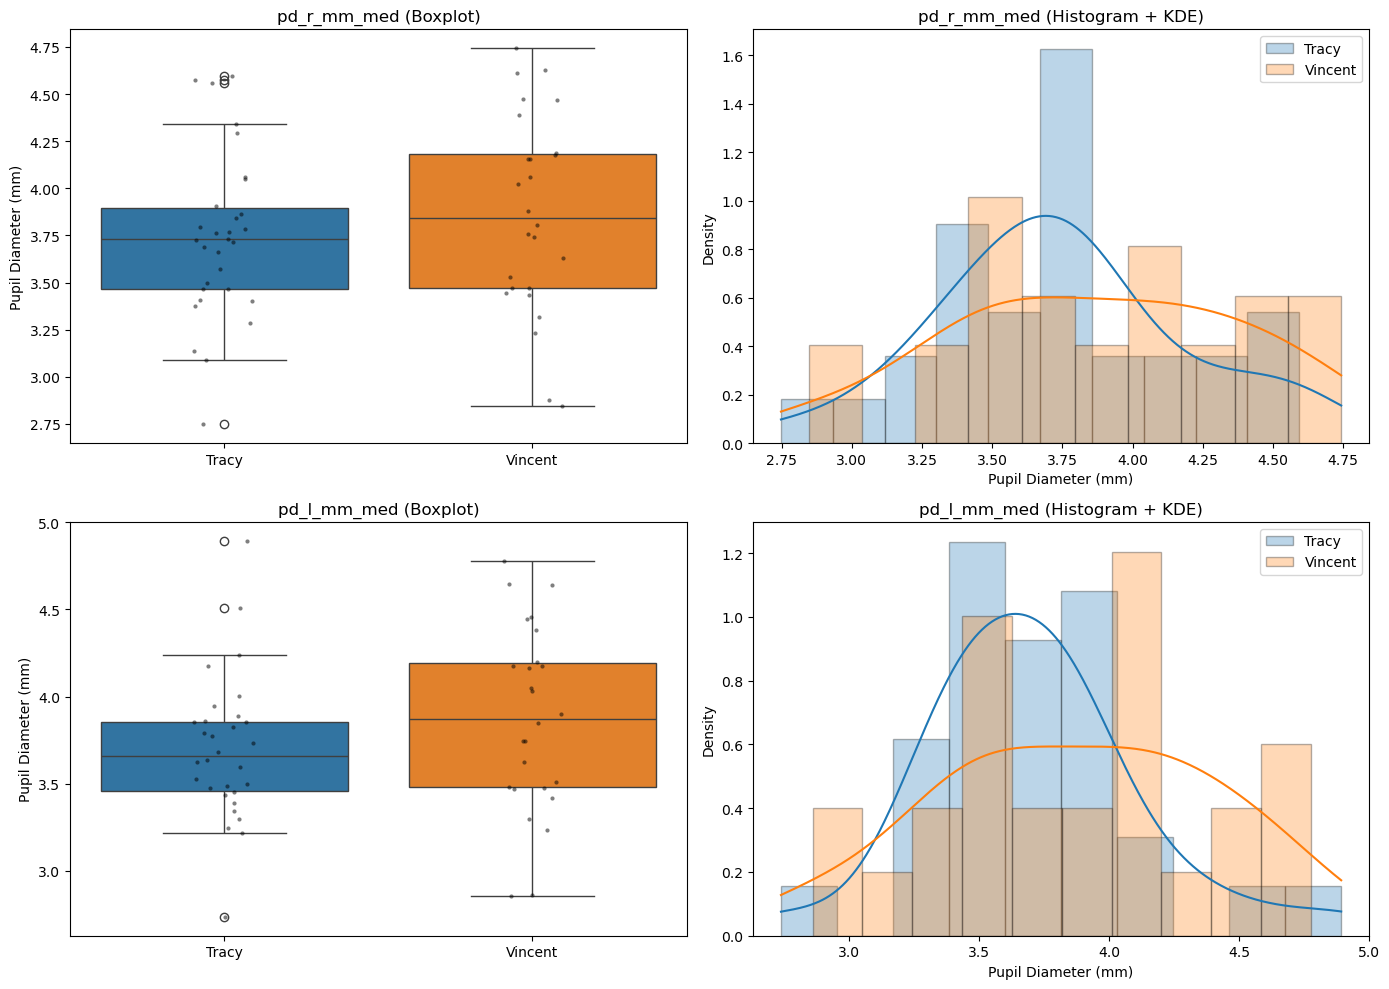

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

# Tracy data
tracy_pd = {
    "SubjectID": [365, 479, 1754, 2258, 2361, 2693, 3246, 3310, 3572, 3976, 4176, 4597,
                  4796, 4917, 5238, 5531, 5741, 6642, 7093, 7264, 7412, 7842, 8007, 8469,
                  8673, 8695, 9472, 9502, 9586, 9601],
    "pd_r_mm_med": [3.573112, 4.575958, 3.727173, 3.466995, 3.729889, 3.135895, 3.785065, 3.468140, 3.691193, 4.340836,
                    3.841110, 3.760956, 3.794281, 3.768906, 3.408569, 3.903732, 4.051437, 4.057922, 3.663589, 4.594009,
                    3.497833, 3.862335, 4.291290, 3.287781, 3.402725, 2.747620, 3.089111, 3.377838, 3.716537, 4.558250],
    "pd_l_mm_med": [3.498535, 4.893417, 3.453369, 3.525558, 3.622742, 3.386902, 3.478317, 3.435852, 3.637466, 4.175461,
                    3.776062, 3.598526, 4.000961, 3.790100, 3.852058, 3.682022, 3.734695, 3.888397, 3.825378, 3.944061,
                    3.487030, 3.854034, 4.509476, 3.217896, 3.244751, 2.736664, 3.344376, 3.298859, 3.857193, 4.237366],
    "Hue": "Tracy"
}
df_tracy = pd.DataFrame(tracy_pd)

# Vincent data (only the relevant columns: pd_r_mm_med and pd_l_mm_med)
vincent_pd_r = [3.759805, 3.446270, 4.625615, 3.741092, 3.807524, 4.466974, 2.877986, 3.471501, 3.316515, 3.528963,
                3.628134, 4.157754, 4.153845, 4.389789, 4.186720, 4.743265, 4.021793, 3.878542, 2.846602, 3.432354,
                4.176031, 4.476009, 3.471349, 4.610447, 4.061825, 3.230366]

vincent_pd_l = [3.743159, 3.477455, 4.639995, 3.743284, 3.847689, 4.454147, 2.858756, 3.482612, 3.296860, 3.511140,
                3.621957, 4.161399, 4.172320, 4.378710, 4.172700, 4.777077, 4.033188, 3.898499, 2.862358, 3.416253,
                4.199012, 4.445678, 3.467739, 4.646306, 4.049195, 3.232009]

df_vincent = pd.DataFrame({
    "pd_r_mm_med": vincent_pd_r,
    "pd_l_mm_med": vincent_pd_l,
    "Hue": "Vincent"
})

# Combine data
combined = pd.concat([df_tracy, df_vincent], ignore_index=True)

# Prepare figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Colors
colors = {"Tracy": "#1f77b4", "Vincent": "#ff7f0e"}

# Plot settings
for i, eye in enumerate(["pd_r_mm_med", "pd_l_mm_med"]):
    # Boxplot
    sns.boxplot(data=combined, x="Hue", y=eye, ax=axes[i, 0], palette=colors)
    sns.stripplot(data=combined, x="Hue", y=eye, color='black', alpha=0.5, size=3, jitter=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"{eye} (Boxplot)")
    axes[i, 0].set_ylabel("Pupil Diameter (mm)")
    axes[i, 0].set_xlabel("")

    # KDE + Histogram
    tracy_vals = df_tracy[eye]
    vincent_vals = df_vincent[eye]
    x_range = np.linspace(min(tracy_vals.min(), vincent_vals.min()),
                          max(tracy_vals.max(), vincent_vals.max()), 500)
    kde_tracy = gaussian_kde(tracy_vals)
    kde_vincent = gaussian_kde(vincent_vals)

    axes[i, 1].hist(tracy_vals, bins=10, density=True, alpha=0.3,
                    color=colors["Tracy"], edgecolor='black', label="Tracy")
    axes[i, 1].hist(vincent_vals, bins=10, density=True, alpha=0.3,
                    color=colors["Vincent"], edgecolor='black', label="Vincent")
    axes[i, 1].plot(x_range, kde_tracy(x_range), color=colors["Tracy"])
    axes[i, 1].plot(x_range, kde_vincent(x_range), color=colors["Vincent"])
    axes[i, 1].set_title(f"{eye} (Histogram + KDE)")
    axes[i, 1].set_xlabel("Pupil Diameter (mm)")
    axes[i, 1].set_ylabel("Density")
    axes[i, 1].legend()

plt.tight_layout()
plt.show()
